In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interv = pd.read_csv('https://raw.githubusercontent.com/mission-donnees-dett/Interventions/refs/heads/main/inter2025.csv', sep=';')

### Catégorisation de toutes les interventions par durée

In [4]:
interv

,N° Inter DiRIF,N° Inter CEI,CEI,Auteur,Date d'appel,Heure d'appel,Origine de l'appel,Axe,Sens,Localisation,...,État de la chaussée,Conditions météo,Intervenants,Circonstances,Actions réalisées,Présence du tiers responsable,Véhicules impliqués,Agents,N° Bretelle,N° Autoroute
0,2025-000001,2025-000001,Chevilly-Larue,"[Sylvain, HUBERT]",01/01/2025,01:30,Autre - M DOS SANTOS HUGO,A86,EXT,50.900,...,SECHE,RAS,Dépanneurs,NaN,"Balisage, Protection",NaN,VL (1),NaN,NaN,NaN
1,2025-000002,2025-000001,Villabé,"[Steeve, BOUCHER]",01/01/2025,05:10,OST,A6,W,18,...,NaN,NaN,"Dépanneurs, Police",NaN,Neutralisation voie lente,NaN,NaN,NaN,NaN,NaN
2,2025-000009,2025-000002,Villabé,"[Steeve, BOUCHER]",01/01/2025,06:14,OST,A6,Y,19.500,...,NaN,NaN,Dépanneurs,NaN,Neutralisation voie lente,NaN,NaN,NaN,NaN,NaN
3,2025-000010,2025-000002,Chevilly-Larue,"[Sylvain, HUBERT]",01/01/2025,04:50,OST,A6a,Y,0.200,...,SECHE,RAS,Dépanneurs,NaN,"Balisage, Neutralisation voie lente",NaN,VL (1),NaN,NaN,NaN
4,2025-000011,2025-000003,Chevilly-Larue,"[Sylvain, HUBERT]",01/01/2025,06:45,OST,A6a,W,4.100,...,HUMIDE,RAS,"Police, Pompiers, Dépanneurs",NaN,"Balisage, Neutralisation voie lente, Nettoyage...",NaN,VL (1),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,2025-015599,2025-001683,Champigny,"[Cédric, RIVIERE]",05/05/2025,16:51,OST,A4,Y,4.700,...,NaN,NaN,Dépanneurs,NaN,"Balisage, Neutralisation voie lente",NaN,VL (1),NaN,NaN,NaN
15145,2025-015600,2025-001684,Champigny,"[Cédric, RIVIERE]",05/05/2025,17:51,OST,A4,Y,1.600,...,NaN,NaN,Dépanneurs,NaN,"Balisage, Neutralisation voie rapide",NaN,VL (1),NaN,NaN,NaN
15146,2025-015601,2025-001512,Chevilly-Larue,"[Jules, PALMIER]",06/05/2025,16:05,RI,A6a,Y,1.5,...,SECHE,RAS,Dépanneurs,NaN,Protection,NaN,VL (1),NaN,NaN,NaN
15147,2025-015602,2025-001685,Champigny,"[Cédric, RIVIERE]",05/05/2025,18:16,OST,A4,Y,12.200,...,NaN,NaN,Dépanneurs,NaN,"Balisage, Neutralisation voie rapide",NaN,VL (2),NaN,NaN,NaN


In [15]:
CEI_uniques = interv.iloc[:, 2].unique()

CEI_uniques

array(['Chevilly-Larue', 'Villabé', 'Champigny', 'Orsay', 'Villeparisis',
       'Saint-Denis', 'Orgeval', 'Rocquencourt-Boulogne',
       'Jouy-en-Josas (site de Jouy)', 'Brie-Comte-Robert', 'Ablis',
       'Nanterre', 'Fontenay', 'Jouy-en-Josas (site de Plaisir)',
       'Eragny', 'Rosny', 'Jouy-en-Josas'], dtype=object)

In [16]:
interv.columns

Index(['N° Inter DiRIF', 'N° Inter CEI', 'CEI', 'Auteur', 'Date d'appel',
       'Heure d'appel', 'Origine de l'appel', 'Axe', 'Sens', 'Localisation',
       'Voies', 'Heure de début', 'Heure de fin', 'Type d'intervention',
       'Précision niveau 1', 'Précision niveau 2', 'Observations',
       'Présence du RI', 'DDP', 'Commune',
       'Horaire d'arrivée sur le lieu d'intervention',
       'Horaire du départ du lieu d'intervention', 'Moyens humains',
       'Moyens matériels', 'État de la chaussée', 'Conditions météo',
       'Intervenants', 'Circonstances', 'Actions réalisées',
       'Présence du tiers responsable', 'Véhicules impliqués', 'Agents',
       'N° Bretelle', 'N° Autoroute'],
      dtype='object')

In [ ]:
interv_dates_heures = interv.iloc[:, [4, 5, 11, 12]].copy() 

In [36]:
interv_dates_heures = interv_dates_heures.dropna(subset=['Heure de début', 'Heure de fin']) # DROP NaN START AND END TIMES

interv_dates_heures 

,Date d'appel,Heure d'appel,Heure de début,Heure de fin
0,01/01/2025,01:30,01:30,02:45
1,01/01/2025,05:10,05:10,06:40
2,01/01/2025,06:14,06:14,08:10
3,01/01/2025,04:50,04:50,05:50
4,01/01/2025,06:45,06:45,08:30
...,...,...,...,...
15143,05/05/2025,15:28,15:28,15:46
15144,05/05/2025,16:51,16:51,17:12
15145,05/05/2025,17:51,17:51,18:16
15147,05/05/2025,18:16,18:16,18:51


In [ ]:
# FORMAT TIMES

interv_dates_heures['Heure de début'] = pd.to_datetime(interv_dates_heures['Heure de début'], format='%H:%M')
interv_dates_heures['Heure de fin'] = pd.to_datetime(interv_dates_heures['Heure de fin'], format='%H:%M')

# ADD DURATION OF INTERVENTION COLUMN 'DURÉE'

interv_dates_heures['Durée'] = interv_dates_heures['Heure de fin'] - interv_dates_heures['Heure de début']

# CALCULATE VALUES FOR 'DURÉE'

interv_dates_heures['Heure de début'] = interv_dates_heures['Heure de début'].dt.strftime('%H:%M')
interv_dates_heures['Heure de fin'] = interv_dates_heures['Heure de fin'].dt.strftime('%H:%M')
interv_dates_heures['Durée'] = (interv_dates_heures['Durée'].dt.total_seconds() // 60).astype(int)


interv_dates_heures['Durée'] = (pd.to_datetime(interv_dates_heures['Heure de fin'], format='%H:%M') - 
pd.to_datetime(interv_dates_heures['Heure de début'], format='%H:%M')).dt.total_seconds() // 60


interv_dates_heures['Durée'] = interv_dates_heures['Durée'].astype(int).apply(lambda x: f"{x // 60:02}:{x % 60:02}")

In [ ]:

interv_dates_heures['Durée'] = (pd.to_datetime(interv_dates_heures['Heure de fin'], format='%H:%M') - 
pd.to_datetime(interv_dates_heures['Heure de début'], format='%H:%M')).dt.total_seconds() // 60


interv_dates_heures['Durée'] = interv_dates_heures['Durée'].astype(int).apply(lambda x: f"{x // 60:02}:{x % 60:02}")

In [42]:
interv_dates_heures

,Date d'appel,Heure d'appel,Heure de début,Heure de fin,Durée
0,01/01/2025,01:30,01:30,02:45,01:15
1,01/01/2025,05:10,05:10,06:40,01:30
2,01/01/2025,06:14,06:14,08:10,01:56
3,01/01/2025,04:50,04:50,05:50,01:00
4,01/01/2025,06:45,06:45,08:30,01:45
...,...,...,...,...,...
15143,05/05/2025,15:28,15:28,15:46,00:18
15144,05/05/2025,16:51,16:51,17:12,00:21
15145,05/05/2025,17:51,17:51,18:16,00:25
15147,05/05/2025,18:16,18:16,18:51,00:35


In [45]:
# DISTRIBUTION OF INTERVENTION DURATION (@30min)

interv_dates_heures['Durée_minutes'] = interv_dates_heures['Durée'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

intervalles = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0–30', '31–60', '61–90', '91–120', '121–150', '151–180', '181–210', '211–240']

interv_dates_heures['Durée_cat'] = pd.cut(interv_dates_heures['Durée_minutes'], bins=intervalles, labels=labels, right=True, include_lowest=True)

interv_duree_cat = interv_dates_heures['Durée_cat'].value_counts().sort_index()

In [46]:
interv_duree_cat

0–30       1368
31–60      2178
61–90      1195
91–120      495
121–150     195
151–180      87
181–210      27
211–240      17
Name: Durée_cat, dtype: int64

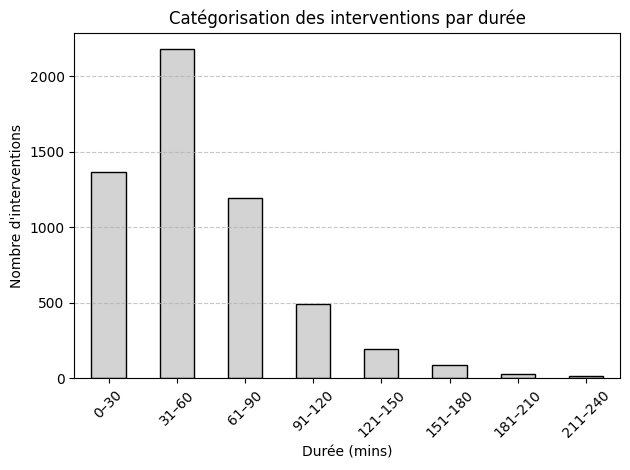

In [49]:
interv_duree_cat.plot(kind='bar', color='lightgrey', edgecolor='black')

plt.title('Catégorisation des interventions par durée')
plt.xlabel('Durée (mins)')
plt.ylabel("Nombre d'interventions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [52]:
CEI_uniques

array(['Chevilly-Larue', 'Villabé', 'Champigny', 'Orsay', 'Villeparisis',
       'Saint-Denis', 'Orgeval', 'Rocquencourt-Boulogne',
       'Jouy-en-Josas (site de Jouy)', 'Brie-Comte-Robert', 'Ablis',
       'Nanterre', 'Fontenay', 'Jouy-en-Josas (site de Plaisir)',
       'Eragny', 'Rosny', 'Jouy-en-Josas'], dtype=object)

### Catégorisation des interventions par CEI

##### CEI - erreurs NaN (dates/heures)

In [55]:
CEI_uniques

array(['Chevilly-Larue', 'Villabé', 'Champigny', 'Orsay', 'Villeparisis',
       'Saint-Denis', 'Orgeval', 'Rocquencourt-Boulogne',
       'Jouy-en-Josas (site de Jouy)', 'Brie-Comte-Robert', 'Ablis',
       'Nanterre', 'Fontenay', 'Jouy-en-Josas (site de Plaisir)',
       'Eragny', 'Rosny', 'Jouy-en-Josas'], dtype=object)

In [114]:
nan_counts_début = interv.groupby(interv.iloc[:, 2])[interv.columns[11]].apply(lambda g: g.isna().sum())
nan_counts_fin = interv.groupby(interv.iloc[:, 2])[interv.columns[12]].apply(lambda g: g.isna().sum())
nan_counts_début = nan_counts_début.rename("Heure de début NaN")
nan_counts_fin = nan_counts_fin.rename("Heure de fin NaN")

nan_counts_début = nan_counts_début.reset_index()
nan_counts_fin = nan_counts_fin.reset_index()

nan_counts_début_fin = pd.merge(nan_counts_début, nan_counts_fin, on=interv.columns[2])
nan_counts_début_fin = nan_counts_début_fin.sort_values(by=["Heure de début NaN", "Heure de fin NaN"], ascending=False)

nan_counts_début_fin

,CEI,Heure de début NaN,Heure de fin NaN
12,Rocquencourt-Boulogne,1299,1299
14,Saint-Denis,1219,1220
13,Rosny,1181,1181
9,Nanterre,1106,993
4,Eragny,956,956
11,Orsay,956,931
16,Villeparisis,826,825
1,Brie-Comte-Robert,409,410
5,Fontenay,270,270
15,Villabé,254,268


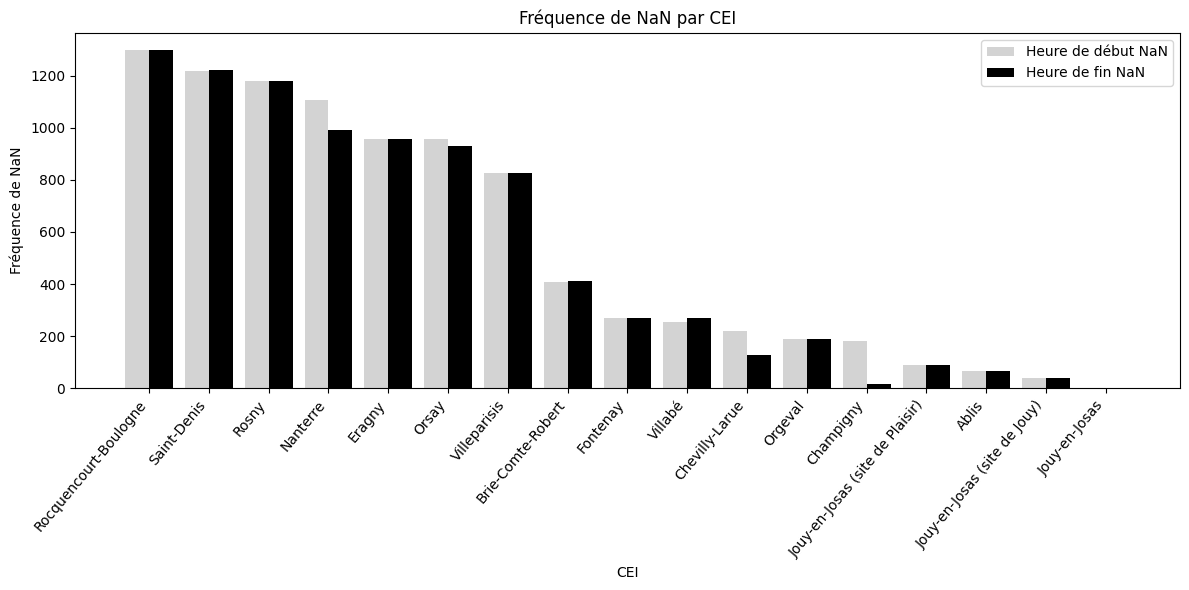

In [ ]:
plt.figure(figsize=(12, 6))

cei = nan_counts_début_fin[interv.columns[2]]
debut_nan = nan_counts_début_fin["Heure de début NaN"]
fin_nan = nan_counts_début_fin["Heure de fin NaN"]

x = np.arange(len(cei))
width = 0.4

plt.bar(x - width/2, debut_nan, width, label='Heure de début NaN', color='lightgrey')
plt.bar(x + width/2, fin_nan, width, label='Heure de fin NaN', color='black')

plt.xlabel("CEI")
plt.ylabel("Fréquence de NaN")
plt.title("Fréquence de NaN par CEI")
plt.xticks(ticks=x, labels=cei, rotation=50, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

git config --global user.email "mission.donnees.dett@gmail.com"
git config --global user.name "Your Name"